In [2]:
''' 1: data exploration(kham pha du lieu)'''

' 1: data exploration(kham pha du lieu)'

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"D:\KhoaHocMayTinh\ki_6\cong_nghe_phan_mem\projectCaNhan\app\ML\archive\bmi.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
target = 'Index'
labels = ['Extremely weak' , 'weak' , 'normal' , 'overweight' , 'obsesity' , 'extreme obesity']
features = [i for  i in df.columns.values if i not in [target]]
original_df =  df.copy(deep=True)

display(df.head())


print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3



Inference: The Datset consists of 4 features & 500 samples.


In [6]:
#  kiem tra cac dtypes of all the colums

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [8]:
#  kiem tra so luong duy nhat  trong moi cot 
df.nunique().sort_values()

Gender      2
Index       6
Height     60
Weight    110
dtype: int64

In [9]:
#  kiem tra so luong hang duy nhat trong cac cot 
nu =  df[features].nunique().sort_values()
nf =  [];  cf = [] ; nnf = 0 ; ncf = 0 
for i in range(df[features].shape[1]):
    if nu.values[i] <= 7 : cf.append(nu.index[i])
    else: nf.append(nu.index[i])
    
    
print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 2 numerical & 1 categorical features.


In [10]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [11]:
'''  truc quan hoa du lieu'''

'  truc quan hoa du lieu'

           Target variable distributtion           


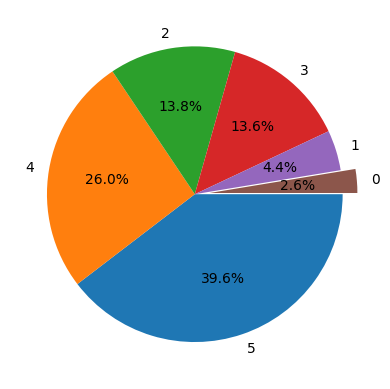

In [12]:
''' xem phan phoi bien muc tieu'''
Map = {}
for e , i  in enumerate(sorted(df[target].unique())):
    Map[i] =  labels[e]
df1 =  df.copy()

df[target] =  df1[target].map(Map)
explode = np.zeros(len(labels))
explode[-1]= 0.1

print('\033[1mTarget variable distributtion'.center(55))

plt.pie(df1[target].value_counts() , labels=df1[target].value_counts().index ,  
        counterclock=False , shadow=False , 
        explode=explode , autopct='%1.1f%%' , radius=1 , startangle=0)
plt.show()
    

thong ke : ta thấy đuọc dataset đang mất cân  bằng dữ liệu 


In [13]:
#  truc quan hoa cac tính năng phân loại 


                                 Visualising category feature:                                  


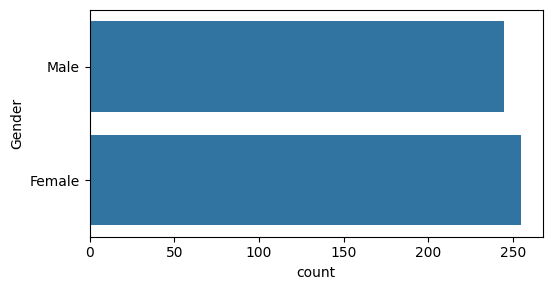

In [14]:
import math 
import seaborn as sns
print('\033[1mVisualising category feature:'.center(100))
n =    3 

plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<= 6 :
        plt.subplot(math.ceil(len(cf)/n) , n , i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.Subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

                                     Features Distribution                                      


C:\Users\Khanh\AppData\Local\Temp\ipykernel_15788\1775027201.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nf[c]])
C:\Users\Khanh\AppData\Local\Temp\ipykernel_15788\1775027201.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nf[c]])


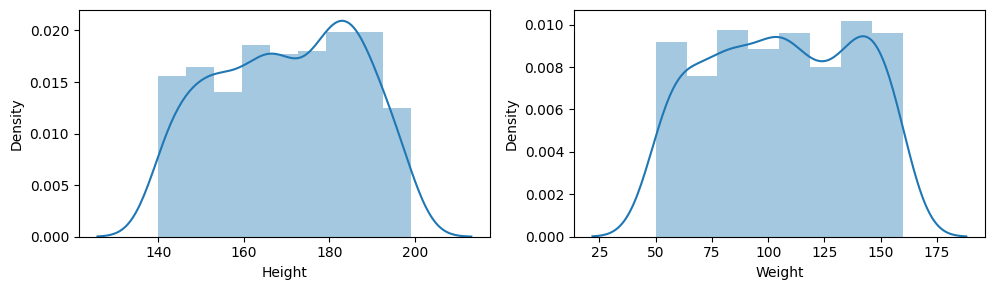

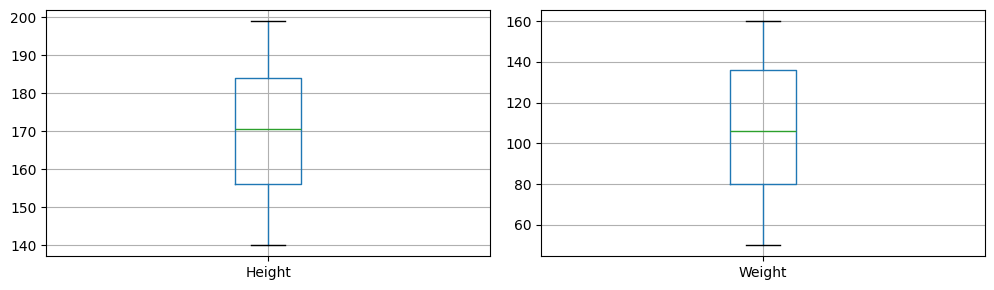

In [15]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show();

co nhie du lieu ngoai lai co mat trong bo du lieu

d:\KhoaHocMayTinh\ki_6\cong_nghe_phan_mem\projectCaNhan\.venv\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


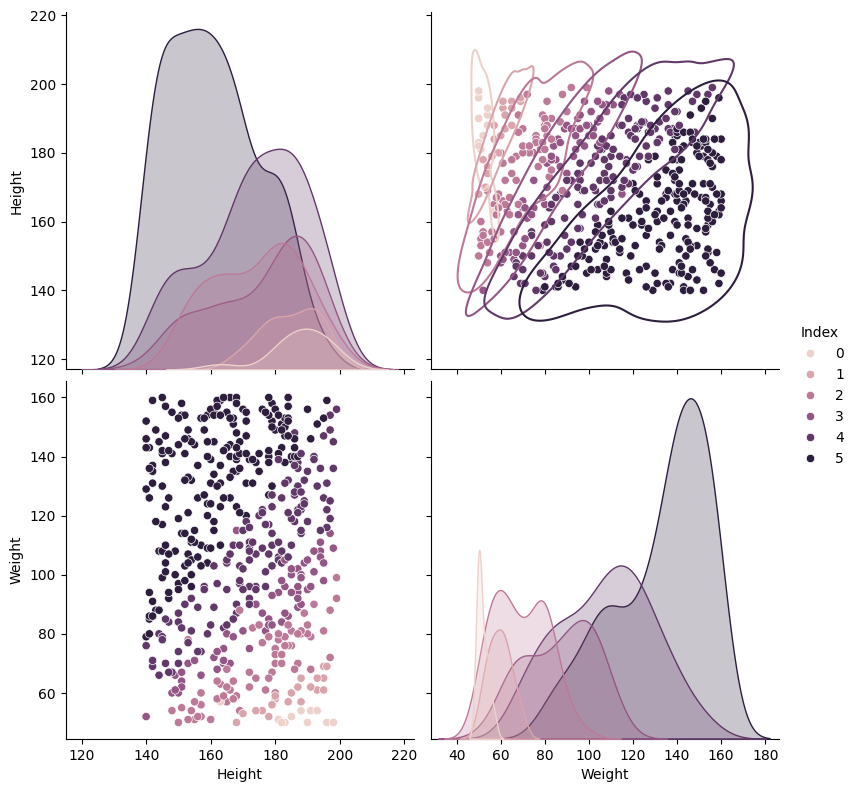

In [16]:
#  moi quan he trong giuax cac feature 

g = sns.pairplot(df1  , hue=target ,  size= 4)
g.map_upper(sns.kdeplot , levels =  1  ,color = '.2')
plt.show()


các mẫu dữ liệu  ,  có rất nhiều dữ liệu trông chéo cho cacs lớp kết quả khác 
, gây ra khó khăn cho việc phân biệt=> cần phải donj dẹp bỏ các dữ liệu bất thường


In [17]:
''' Tiền sử lý dữ liệu'''

' Tiền sử lý dữ liệu'

In [18]:
#  lọai bỏ các hàng bị trùng lặp 
counter = 0 
r , c =  original_df.shape

df1 = df.copy()

df1.drop_duplicates(inplace= True)  
df1.reset_index(drop= True , inplace= True)
if df1.shape==(r,c):
    print('\n\033[1mSuy Luan:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mSuy Luan:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Suy Luan: Number of duplicates dropped ---> 11


In [19]:
''' kiem tra cac phan tu rong '''
nvc =  pd.DataFrame(df1.isnull().sum().sort_values() , columns=['total null values'])
nvc['ti le'] = round(nvc['total null values']/df1.shape[0],3)*100
print(nvc)

        total null values  ti le
Gender                  0    0.0
Height                  0    0.0
Weight                  0    0.0
Index                   0    0.0


In [20]:
df1.head()

,Gender,Height,Weight,Index
0,Male,174,96,obsesity
1,Male,189,87,normal
2,Female,185,110,obsesity
3,Female,195,104,overweight
4,Male,149,61,overweight


In [21]:
#  chuyen doi cac cot phan loai thanh  so( gioi tinh)


ecc =  nvc[nvc['ti le'] != 0 ].index.values
print(ecc)
dcc = [i for i in df.columns if i not in ecc]




df3 =  df1[dcc]


fcc =  [i for  i in cf if i not in ecc]

oh = True
dm = True



for i in fcc:
    if df3[i].nunique() ==  2:
        if oh == True : 
            print("one hot encoding on features")
            print(i) 
            oh = False
            
            df3[i] =  pd.get_dummies(df3[i] , drop_first=True , prefix=str(i))
    if (df3[i].nunique()> 2 and df3[i].nunique()< 17 ):
        if dm == True :
            print("Dummy encoding on features")
            print(i) 
            dm = False
            df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape
            


[]
one hot encoding on features
Gender


(489, 4)

In [22]:
df3.head()

,Gender,Height,Weight,Index
0,True,174,96,obsesity
1,True,189,87,normal
2,False,185,110,obsesity
3,False,195,104,overweight
4,True,149,61,overweight


In [23]:
#Removal of outlier:

df4 = df3.copy()

for i in [i for i in df4.columns]:
    if df4[i].nunique()>=12:
        Q1 = df4[i].quantile(0.25)
        Q3 = df4[i].quantile(0.75)
        IQR = Q3 - Q1
        df4 = df4[df4[i] <= (Q3+(1.5*IQR))]
        df4 = df4[df4[i] >= (Q1-(1.5*IQR))]
df4 = df4.reset_index(drop=True)
display(df4.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df4.shape[0]))

,Gender,Height,Weight,Index
0,True,174,96,obsesity
1,True,189,87,normal
2,False,185,110,obsesity
3,False,195,104,overweight
4,True,149,61,overweight



Inference: Before removal of outliers, The dataset had 489 samples.
Inference: After removal of outliers, The dataset now has 489 samples.


In [24]:
#  su dung smote để giải quyết mất cân bằng dữ liệu 

from  imblearn.over_sampling import SMOTE
df5 = df4.copy()


print('phan phoi lop goc')
print(df5[target].value_counts())


xf =  df5.columns
X =  df5.drop([target] , axis= 1 )
Y =  df5[target]




smote =  SMOTE()

X , Y = smote.fit_resample(X , Y )
df5= pd.DataFrame(X , columns=xf)

df5[target] = Y


print('\n  dataset sau khi smote :')
print(Y.value_counts())

phan phoi lop goc
Index
extreme obesity    195
obsesity           128
normal              69
overweight          64
weak                20
Extremely weak      13
Name: count, dtype: int64

  dataset sau khi smote :
Index
obsesity           195
normal             195
overweight         195
extreme obesity    195
weak               195
Extremely weak     195
Name: count, dtype: int64


In [25]:
print(df.shape[0])

500


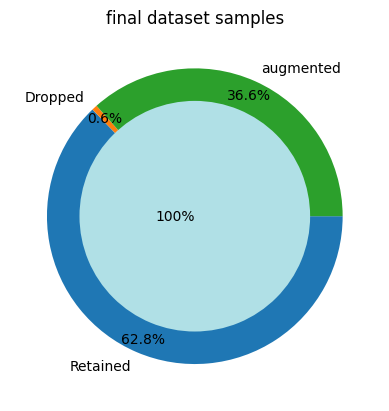

the final dataset after cleanup has 1170 samples & 4  columns


In [26]:
#  kich thuc dataset cuoi cung sau khi tien su ly du lieu
df = df5.copy()

plt.title("final dataset samples")
plt.pie([df.shape[0] , original_df.shape[0] -  df4.shape[0] ,df5.shape[0] - df4.shape[0] ], radius= 1 , shadow=  False , 
         labels=['Retained' , 'Dropped' , "augmented"] ,  counterclock=False ,
         autopct='%1.1f%%' , pctdistance=0.9 , explode=[0,0,0])
plt.pie([df.shape[0]] , labels=['100%'], labeldistance=-0, radius=0.78 , shadow=False , colors=['powderblue'])
plt.show()
print('the final dataset after cleanup has {} samples & {}  columns'.format(df.shape[0] ,  df.shape[1]))

In [27]:
'4. thao tac du lieu'

'4. thao tac du lieu'

In [28]:
from random import random

from sklearn.model_selection import train_test_split

X =  df.drop([target] , axis= 1 )
Y = df[target]

Train_X , Test_X , Train_Y , Test_Y = train_test_split(X , Y , train_size = 0.8 , test_size = 0.2 , random_state = 42)
print('original set -----> ' , X.shape ,  Y.shape , '\nTraining set --->',
      Train_X.shape , Train_Y.shape , '\n testing set -----> ' , 
      Test_X.shape ,  Test_Y.shape)

original set ----->  (1170, 3) (1170,) 
Training set ---> (936, 3) (936,) 
 testing set ----->  (234, 3) (234,)


In [31]:
from sklearn.preprocessing import StandardScaler
# tieu chuam hoa scaling 
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,Gender,Height,Weight
count,9.360000e+02,9.360000e+02,9.360000e+02
mean,-3.036507e-17,-6.110971e-16,-1.062778e-16
std,1.000535e+00,1.000535e+00,1.000535e+00
min,-7.173305e-01,-2.374459e+00,-1.067635e+00
25%,-7.173305e-01,-7.381066e-01,-8.498470e-01
50%,-7.173305e-01,2.764316e-01,-2.742632e-01
75%,1.394057e+00,7.673372e-01,6.746722e-01
max,1.394057e+00,1.487332e+00,2.354755e+00



                                Standardardization on Testing set                                


,Gender,Height,Weight
count,234.000000,234.000000,234.000000
mean,-0.022558,0.002867,0.029816
std,0.994208,0.991316,1.015458
min,-0.717331,-2.374459,-1.067635
25%,-0.717331,-0.787197,-0.943185
50%,-0.717331,0.309159,-0.196482
75%,1.394057,0.701883,0.768010
max,1.394057,1.421878,2.354755


In [32]:
'''5 . trich xuat chuc nang'''

'5 . trich xuat chuc nang'

In [33]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,obsesity
1,1,189,87,normal
2,0,185,110,obsesity
3,0,195,104,overweight
4,1,149,61,overweight


In [34]:
print(labels)
label_mapping = {label: idx for idx, label in enumerate(labels)}
df['Index'] = df['Index'].map(label_mapping)
print(df)

['Extremely weak', 'weak', 'normal', 'overweight', 'obsesity', 'extreme obesity']
      Gender  Height  Weight  Index
0          1     174      96      4
1          1     189      87      2
2          0     185     110      4
3          0     195     104      3
4          1     149      61      3
...      ...     ...     ...    ...
1165       0     179      57      1
1166       0     180      58      1
1167       0     181      57      1
1168       0     180      58      1
1169       1     187      61      1

[1170 rows x 4 columns]


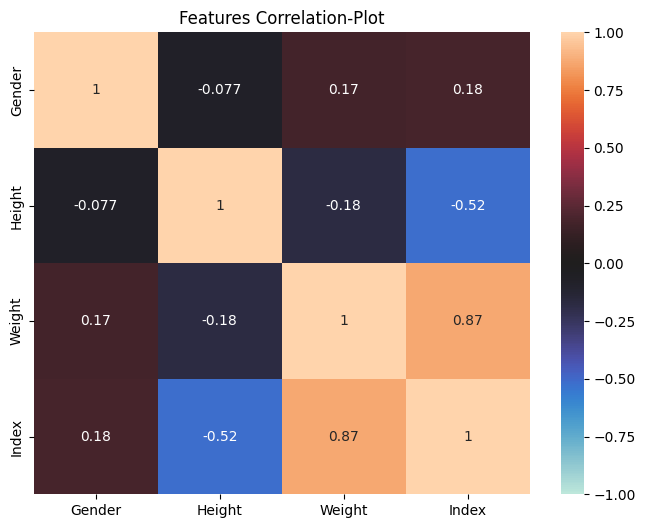

In [35]:

features = df.columns
plt.figure(figsize=[8,6])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()

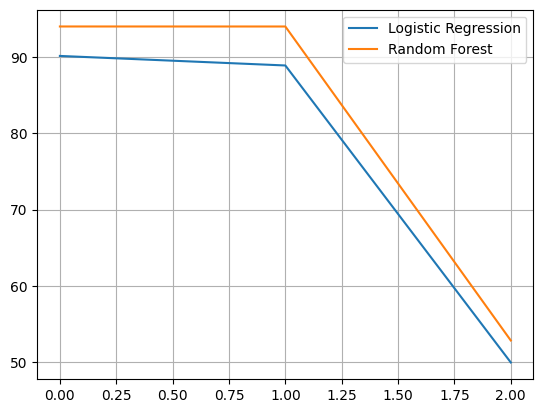

In [39]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from xgboost import XGBClassifier  
from sklearn.feature_selection import RFE

# Khởi tạo mô hình Logistic Regression
LR = LogisticRegression()

# Danh sách lưu điểm F1 cho từng mô hình
scores1, scores2, scores3 = [], [], []

# Lặp qua từng số lượng đặc trưng để chọn
for i in range(len(Train_X_std.columns)):
    # Áp dụng Recursive Feature Elimination (RFE)
    rfe = RFE(LR, n_features_to_select=len(Train_X_std.columns) - i)
    rfe.fit(Train_X_std, Train_Y)

    # Lấy danh sách các cột được chọn
    selected_features = Train_X_std.columns[rfe.support_]

    # Huấn luyện các mô hình và tính điểm F1
    scores1.append(f1_score(Test_Y, LogisticRegression().fit(Train_X_std[selected_features], Train_Y).predict(Test_X_std[selected_features]), average='weighted') * 100)
    scores2.append(f1_score(Test_Y, RandomForestClassifier().fit(Train_X_std[selected_features], Train_Y).predict(Test_X_std[selected_features]), average='weighted') * 100)
    # scores3.append(f1_score(Test_Y, XGBClassifier(eval_metric='logloss').fit(Train_X_std[selected_features], Train_Y).predict(Test_X_std[selected_features]), average='weighted') * 100)

# Vẽ biểu đồ kết quả
plt.plot(scores1, label='Logistic Regression')
plt.plot(scores2, label='Random Forest')
# plt.plot(scores3, label='XGBoost')

plt.legend()
plt.grid()
plt.show()


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Khởi tạo Evaluation_Results nếu chưa có
Evaluation_Results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC score'])

def Classification_Summary(pred, pred_prob, i):
    global Evaluation_Results  # Đảm bảo biến này có thể cập nhật
    if len(Evaluation_Results) <= i:
        Evaluation_Results = Evaluation_Results.append(pd.Series(dtype='float64'), ignore_index=True)

    Evaluation_Results.loc[i, 'Accuracy'] = round(accuracy_score(Test_Y, pred), 3) * 100   
    Evaluation_Results.loc[i, 'Precision'] = round(precision_score(Test_Y, pred, average='weighted'), 3) * 100
    Evaluation_Results.loc[i, 'Recall'] = round(recall_score(Test_Y, pred, average='weighted'), 3) * 100
    Evaluation_Results.loc[i, 'F1-score'] = round(f1_score(Test_Y, pred, average='weighted'), 3) * 100
    Evaluation_Results.loc[i, 'AUC-ROC score'] = round(roc_auc_score(Test_Y, pred_prob, multi_class='ovr'), 3) * 100

    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3, '-'*35, i, '-'*35, '>'*3))
    print('Accuracy = {}%'.format(Evaluation_Results.loc[i, 'Accuracy']))
    print('F1 Score = {}%'.format(Evaluation_Results.loc[i, 'F1-score']))
    print('\n \033[1mConfusion Matrix:\033[0m\n', confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n', classification_report(Test_Y, pred))

    # Nếu auc_roc là một hàm khác, hãy đảm bảo nó được định nghĩa
    try:
        auc_roc(Test_Y, pred_prob, curves=['each_class'])
        plt.show()
    except NameError:
        print("\033[91mWarning: 'auc_roc()' chưa được định nghĩa. Hãy kiểm tra lại!\033[0m")


In [76]:
# Building Support Vector Machine Classifier

from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='f1_weighted', n_jobs=-1, cv=cv, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
print(classification_report(Test_Y , pred))

d:\KhoaHocMayTinh\ki_6\cong_nghe_phan_mem\projectCaNhan\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


                 precision    recall  f1-score   support

 Extremely weak       0.98      1.00      0.99        41
extreme obesity       0.95      0.92      0.93        38
         normal       0.97      0.90      0.93        39
       obsesity       0.86      0.94      0.90        47
     overweight       0.92      0.90      0.91        39
           weak       1.00      1.00      1.00        30

       accuracy                           0.94       234
      macro avg       0.95      0.94      0.94       234
   weighted avg       0.94      0.94      0.94       234



In [86]:
pred = SVM.predict(Test_X_std)
print(f'du doan la : {pred}')

du doan la : ['Extremely weak' 'extreme obesity' 'normal' 'overweight' 'obsesity'
 'weak' 'normal' 'obsesity' 'overweight' 'normal' 'weak' 'extreme obesity'
 'overweight' 'weak' 'obsesity' 'weak' 'obsesity' 'obsesity' 'normal'
 'extreme obesity' 'obsesity' 'obsesity' 'Extremely weak' 'Extremely weak'
 'normal' 'Extremely weak' 'overweight' 'Extremely weak' 'Extremely weak'
 'weak' 'weak' 'obsesity' 'obsesity' 'extreme obesity' 'normal'
 'extreme obesity' 'extreme obesity' 'normal' 'obsesity' 'Extremely weak'
 'Extremely weak' 'weak' 'obsesity' 'extreme obesity' 'overweight'
 'normal' 'overweight' 'extreme obesity' 'overweight' 'Extremely weak'
 'extreme obesity' 'weak' 'weak' 'overweight' 'obsesity' 'obsesity'
 'Extremely weak' 'obsesity' 'obsesity' 'overweight' 'weak'
 'Extremely weak' 'extreme obesity' 'normal' 'normal' 'Extremely weak'
 'Extremely weak' 'overweight' 'obsesity' 'overweight' 'overweight'
 'overweight' 'normal' 'obsesity' 'normal' 'Extremely weak'
 'extreme obesity' 'o

In [78]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Test_Y, pred)
print(f"Độ chính xác của mô hình: {accuracy:.2%}")



Độ chính xác của mô hình: 94.02%


In [ ]:
''''  ma trận nhầm lẫn'''

"'  ma trận nhầm lẫn"

In [46]:
print(Test_X_std)

       Gender    Height    Weight
0   -0.717331  0.832791 -1.036523
1    1.394057  0.440067  1.670277
2    1.394057  0.243705 -0.320932
3   -0.717331  0.832791  0.612447
4    1.394057  1.356424  2.012516
..        ...       ...       ...
229  1.394057 -0.999923  1.048024
230  1.394057  0.178250  1.203587
231 -0.717331 -1.392647 -0.974298
232  1.394057 -2.243550 -0.414270
233 -0.717331  0.440067  2.043628

[234 rows x 3 columns]


ma trận nhầm lẫn khi huấn luyện mô hình xong


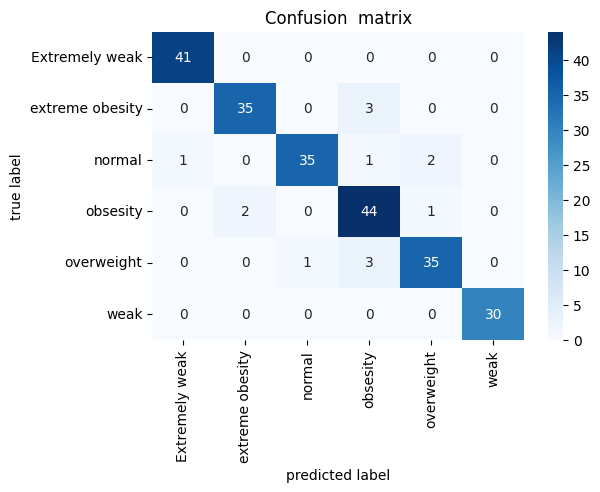

[[41  0  0  0  0  0]
 [ 0 35  0  3  0  0]
 [ 1  0 35  1  2  0]
 [ 0  2  0 44  1  0]
 [ 0  0  1  3 35  0]
 [ 0  0  0  0  0 30]]


In [62]:
print("ma trận nhầm lẫn khi huấn luyện mô hình xong")
cm =  confusion_matrix(Test_Y ,pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm , annot=True , fmt = 'd' , cmap='Blues' ,  xticklabels=np.unique(Test_Y) , yticklabels= np.unique(Test_Y))


plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title("Confusion  matrix")
plt.show()
print(cm)

In [79]:
import joblib 
joblib.dump(SVM, 'modelSVM.pkl')
print('mo hinh luy thanh cong')

mo hinh luy thanh cong


In [102]:
''' du lieu thuc tế  '''
loaded_SVM =  joblib.load('modelSVM.pkl')
data = pd.DataFrame([[1,50,140]] , columns=Train_X_std.columns)
scaler =  StandardScaler()
scaler.fit(Train_X)


X_real_std =  scaler.transform(data)


chuan_doan = loaded_SVM.predict(X_real_std)
print(chuan_doan)

print(X_real_std)



['extreme obesity']
[[ 1.39405747 -8.26532579  1.73250182]]


d:\KhoaHocMayTinh\ki_6\cong_nghe_phan_mem\projectCaNhan\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [66]:
print(Train_X_std)

       Gender    Height    Weight
0    1.394057  0.636429 -0.818734
1    1.394057  0.767337  1.608051
2   -0.717331  0.963699 -0.725396
3   -0.717331  1.029154  0.736897
4   -0.717331  0.178250 -0.849847
..        ...       ...       ...
931 -0.717331 -0.476290 -1.036523
932  1.394057  0.047342 -0.943185
933 -0.717331  0.898245 -0.725396
934 -0.717331 -0.279928  0.332433
935 -0.717331 -0.214474 -0.974298

[936 rows x 3 columns]


In [83]:
print(SVM.classes_)

['Extremely weak' 'extreme obesity' 'normal' 'obsesity' 'overweight'
 'weak']


In [100]:
Train_X.to_csv('train_x.csv' ,  index= False)